# Preamble

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

In [6]:
import numpy as np

M = np.array([[2, 3], [-1, 9], [4, 8]])
x = np.array([-2, 4])
np.matmul(M, x)

array([ 8, 38, 24])

In [7]:
energy = pd.read_csv('temp_energy.csv')
energy

,average temperature/°C,Energy consumption/kWh
0,-10,46.5
1,-5,37.9
2,0,33.2
3,5,27.5
4,10,20.3
5,15,21.1
6,20,14.2
7,25,6.3
8,30,5.6


<Axes: xlabel='average temperature/°C', ylabel='Energy consumption/kWh'>

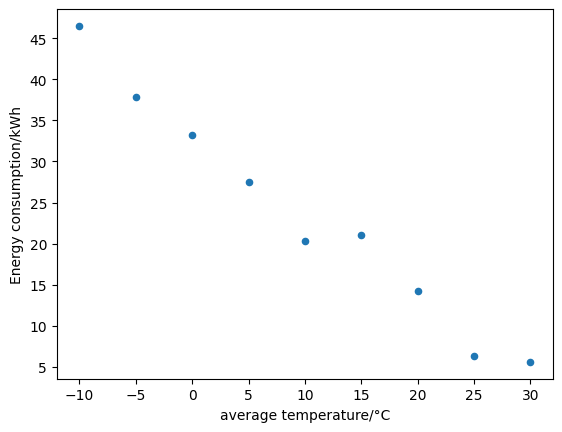

In [8]:
energy.plot(x='average temperature/°C', y='Energy consumption/kWh', kind='scatter')

23.622222222222224

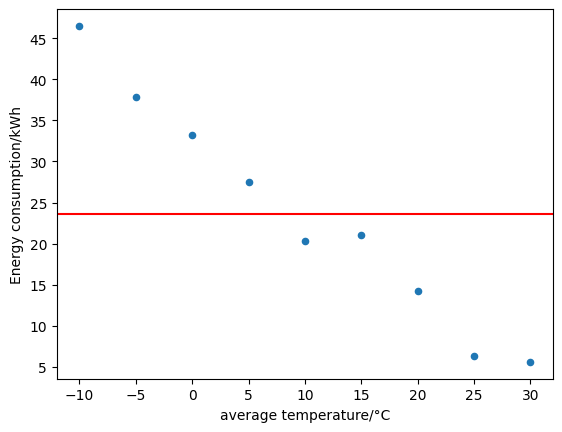

In [9]:
ax = energy.plot(x='average temperature/°C', y='Energy consumption/kWh', kind='scatter')
avg = np.average(energy['Energy consumption/kWh'])
ax.axhline(y = avg, color = 'r')
avg

In [10]:
X = energy.drop(['Energy consumption/kWh'], axis=1)
y = energy['Energy consumption/kWh']

In [11]:
ols = LinearRegression()

ols.fit(X, y)

intercept, coef = ols.intercept_, ols.coef_[0]
intercept, coef

(33.715555555555554, -1.0093333333333334)

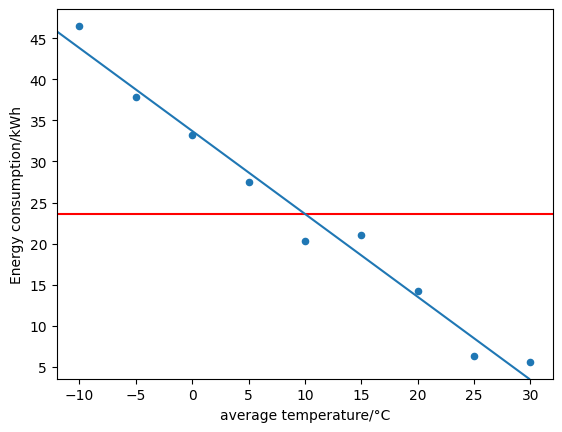

In [12]:
ax = energy.plot(x='average temperature/°C', y='Energy consumption/kWh', kind='scatter')
ax.axhline(y = avg, color = 'r')
ax.axline(xy1 = (0, intercept), slope = coef)

In [13]:
ols = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree = 1)
X1 = poly.fit_transform(X)

ols.fit(X1, y)

intercept, coef = ols.intercept_, ols.coef_
intercept, coef

(0.0, array([33.71555556, -1.00933333]))

In [19]:
ols.score(X1, y)


array([46.5, 37.9, 33.2, 27.5, 20.3, 21.1, 14.2,  6.3,  5.6])

In [22]:
XT = X1.transpose()
print(XT, '\n')

XTX = np.matmul(XT, X1)
print(XTX, '\n')

XTX1 = np.linalg.inv(XTX)
print(XTX1, '\n')

PseudoInv = np.matmul(XTX1, XT)
print(PseudoInv, '\n')

Theta = np.matmul(PseudoInv, y.to_numpy())
print(Theta, '\n')

[[  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [-10.  -5.   0.   5.  10.  15.  20.  25.  30.]] 

[[   9.   90.]
 [  90. 2400.]] 

[[ 0.17777778 -0.00666667]
 [-0.00666667  0.00066667]] 

[[ 2.44444444e-01  2.11111111e-01  1.77777778e-01  1.44444444e-01
   1.11111111e-01  7.77777778e-02  4.44444444e-02  1.11111111e-02
  -2.22222222e-02]
 [-1.33333333e-02 -1.00000000e-02 -6.66666667e-03 -3.33333333e-03
   4.33680869e-19  3.33333333e-03  6.66666667e-03  1.00000000e-02
   1.33333333e-02]] 

[33.71555556 -1.00933333] 



0.8101297081016186

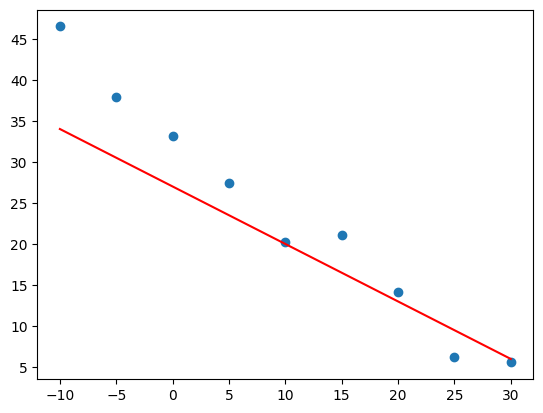

In [114]:
sgd = SGDRegressor(alpha=.1, max_iter=1000, random_state=504)
sgd.fit(X, y)

y_predict = sgd.predict(X)
plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
sgd.score(X, y)

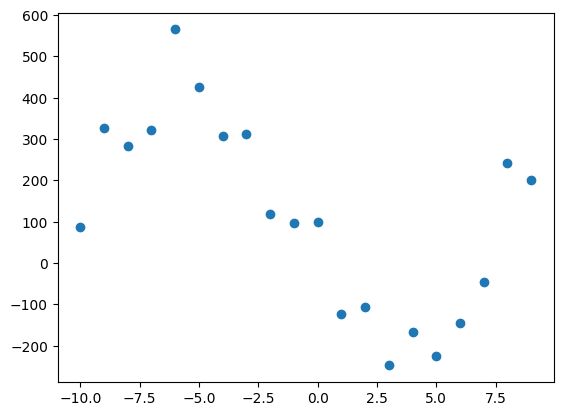

In [ ]:
X = (np.arange(-20, 20, 2) * .5)
np.random.seed(504)
y = X**3 + 4 * X**2 - 75 * X - 22 + np.random.standard_normal(X.size) * 75
plt.scatter(X, y)


In [ ]:
ols = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree = 2)
X2 = poly.fit_transform(X.reshape(-1, 1))

ols.fit(X2, y)

ols.coef_


array([ 51.61335539, -21.70653772,   1.60128768])

0.38962038413611955

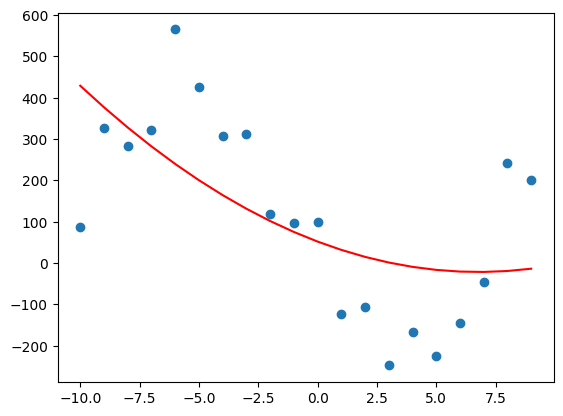

In [ ]:
y_predict = ols.predict(X2)
plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
ols.score(X2, y)

In [ ]:
ols = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree = 3)
X3 = poly.fit_transform(X.reshape(-1, 1))

ols.fit(X3, y)

intercept, coef = ols.intercept_, ols.coef_
intercept, coef

(0.0, array([ 18.82830773, -86.7246962 ,   3.25709817,   1.10387366]))

0.9052901140128919

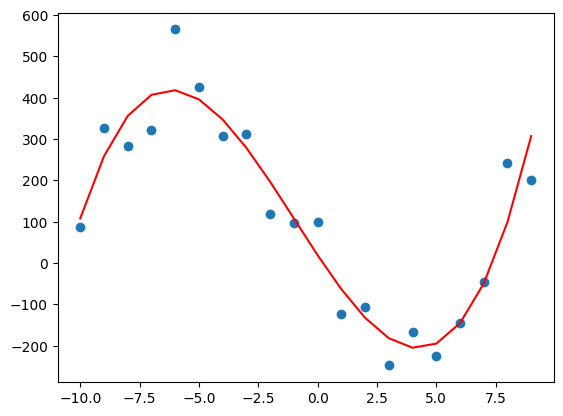

In [ ]:
y_predict = ols.predict(X3)
plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
ols.score(X3, y)

0.9802881674324083

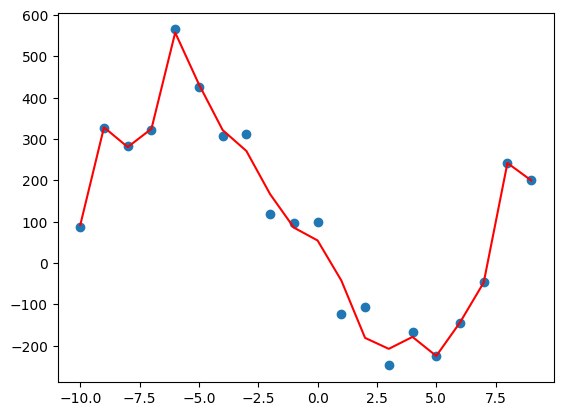

In [ ]:
ols = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree = 15)
X15 = poly.fit_transform(X.reshape(-1, 1))

ols.fit(X15, y)

coef = ols.coef_

y_predict = ols.predict(X15)

plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
ols.score(X15, y)

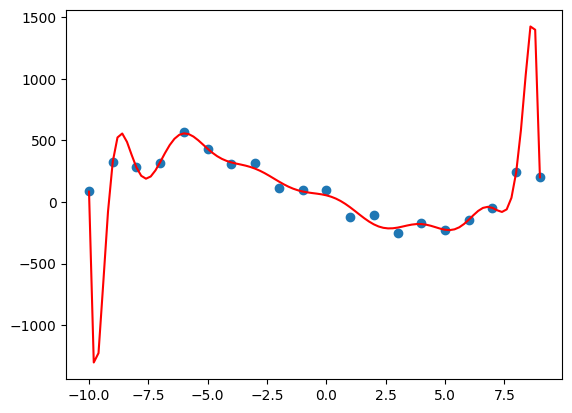

In [ ]:
X_smooth = (np.arange(-100, 92, 2) * .1)
X15_smooth = poly.fit_transform(X_smooth.reshape(-1, 1))
y_predict = ols.predict(X15_smooth)

plt.scatter(X, y)
plt.plot(X_smooth, y_predict, color='r')
